In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [13]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('aiaiaidavid/the-big-dataset-of-ultra-marathon-running', unzip = True, path ='.')

Dataset URL: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running


In [14]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/nt/6vczs37n0kg258110pw_sbyh0000gn/T/ipykernel_46156/107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


# Importing and understanding the data:

In [16]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [17]:
# Get understanding about shape and date type in data frame
print(f'Shape of data: {df.shape}\n')
print('Data types within columns:\n', df.dtypes)

Shape of data: (7461195, 13)

Data types within columns:
 Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object


# NaN Values:

## Exploring and removing (some) NA values

In [18]:
# Number of NaN values:
na_per_column = df.isna().sum()
print(f'How many NaN values:\n{na_per_column}')
# Number of total NaN values: 
print(f'\nTotal NaN values: {na_per_column.sum()}')

How many NaN values:
Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

Total NaN values: 4000912


In [19]:
# Percentage of NaN values per column
num_of_athletes = df.shape[0]
na_percentage = (na_per_column/num_of_athletes *100)
print(f'Number of NaN Values per column:\n{na_percentage}\n')
print(f'Percentage values missing: {na_percentage.sum()}')

Number of NaN Values per column:
Year of event                 0.000000
Event dates                   0.000000
Event name                    0.000000
Event distance/length         0.014113
Event number of finishers     0.000000
Athlete performance           0.000027
Athlete club                 37.882993
Athlete country               0.000040
Athlete year of birth         7.882933
Athlete gender                0.000094
Athlete age category          7.839736
Athlete average speed         0.003002
Athlete ID                    0.000000
dtype: float64

Percentage values missing: 53.622938416701345


## Dropping NaN values: 
- Remove any events without a distance (All running races must have a distance, reject any races without specified distance)
- Remove athletes without a final time (Will not count as athletes according to our criteria)
- We won't drop Athlete gender; athlete could be non-binary or preferred not to answer. 
- We will leave Year of birth and age category, untouched. Large chunk of the data set to drop. Cannot impute values.

In [20]:
# Drop any rows without time and drop any events with no event distance
df = df.dropna(axis = 0, subset=['Athlete performance', 'Event distance/length']) 

# Looking for duplicates and removing them

In [21]:
prev_len = len(df)
df.drop_duplicates(inplace = True)
print('Duplicates removed:', (prev_len-len(df)))

Duplicates removed: 50


# Feature Engineering: Country Code Column

## Find country code from event name and create new column
You can't always assume the first parenthesis you find is a country code ('Pickled feet' is not a country last time I checked) You need to take the last parenthesis.

In [22]:
def extract_last_par(text): # Function used to extract the contents of last parenthesis
    brackets = re.findall(r'\(([^()]*)\)',text) # Find all the content inside parenthesis
    return brackets[-1] if brackets else None 
country_code = df['Event name'].apply(extract_last_par) # Apply function to each event name 
df['Country of event'] = country_code # Create a new country of event column

In [23]:
df['Country of event'].unique() # No more 'pickled feet' country!

array(['CHI', 'RUS', 'SLO', 'USA', 'NED', 'ITA', 'TPE', 'AUS', 'GBR',
       'HKG', 'CHN', 'GER', 'HUN', 'MEX', 'ESP', 'BRA', 'ISR', 'UAE',
       'BUL', 'DEN', 'FRA', 'BEL', 'GRE', 'COL', 'MAS', 'PHI', 'ARG',
       'INA', 'LTU', 'JPN', 'AUT', 'NOR', 'IRL', 'ROU', 'TUR', 'CRC',
       'NZL', 'RSA', 'SVK', 'GUA', 'VIE', 'PER', 'POL', 'POR', 'IND',
       'ECU', 'SWE', 'SRB', 'CAN', 'KOR', 'BLR', 'URU', 'PAR', 'CZE',
       'NCA', 'CAY', 'FIN', 'DOM', 'CYP', 'THA', 'UKR', 'IRI', 'CHA',
       'OMA', 'EST', 'CAM', 'SGP', 'ALG', 'MLT', 'MAD', 'MAR', 'NAM',
       'BIH', 'IVB', 'JOR', 'CRO', 'VEN', 'NEP', 'BRU', 'ESA', 'LUX',
       'SUI', 'ISL', 'BOL', 'MDA', 'MGL', 'BHU', 'MRI', 'KAZ', '', 'LAT',
       'KEN', 'AND', 'ALB', 'TUN', 'MKD', 'CPV', 'LES', 'MON', 'EGY',
       'MOZ', 'LAO', 'SRI', 'PUR', 'MLI', 'ZIM', 'KSA', 'QAT', 'ARU',
       'GRL', 'KOS', 'MNE', 'BOT', 'MYA', 'MTN', 'STP', 'GEO', 'PAK',
       'ATA', 'SEN', 'LBA', 'CMR', 'BUR', 'SEY', 'DJI', 'TRI', 'GUM',
       'PAN', 'C

In [24]:
# Remove country code from race name 
df['Event name'] = df['Event name'].str.replace(r'\([^()]*\)$','',regex = True)

# Feature Engineering: Athlete Age at Year of Event

## Age of Athlete at time of Event 
As we dont have the athlete's exact date of birth we cannot find their age at the time of the event however, we can calculate their age at the year's end. There is the international (based on age at time of event) or a German way (based on age at years end) of calculating age catagories, both of which are used in the data set. There are some difference between the international and German age catagories which mean that certain age categories overlap and can lead to confusion (https://statistik.d-u-v.org/faq.php#CatCalc). 

I want to standardize the age catagories by making my own bins based on the athlete's age at year end (German way). This way If I compare age catagories those who are 19 for example are assigned to U20s and not U23s. By adopting the German age catagories and applying to all athletes, this will allow me to compare age catagory data against one another.

#### Create Age at years end column

In [25]:
df['Athlete age at years end'] = df['Year of event'] - df['Athlete year of birth']

#### Understanding how many missing age categories I can impute by using their age at years end 

In [26]:
# Find athletes who don't have age catagory or age at years end 
cant_impute = (df['Athlete age category'].isna()) & (df['Athlete age at years end'].isna())
print('Age catagories unable to impute:',len(df[cant_impute]))
# Find athletes who dont have an age catagory (isna = True) but do have age at years end (can impute)
can_impute = (df['Athlete age category'].isna()) & (df['Athlete age at years end'].notna())
print('Age catagories able to impute:', len(df[can_impute]))

Age catagories unable to impute: 584640
Age catagories able to impute: 198


#### Create age categories based on calculated age at end of year (gender excluded)

In [27]:
bins = [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,float('inf')]
age_labels = ['U20', '20-29', '30-34', '35-39','40-44','45-49','50-54', '55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+']

new_age_cat = pd.cut(df['Athlete age at years end'], bins, labels = age_labels, right = False)
df['Standardized age category'] = new_age_cat

# Feature Engineering: Timed Event Column
Create a new column which is boolean called 'Time event?', True if event is measured by time, False if event is measured in distance. This will allow me to easily filter out events which are not measured by distance e.g. '24h' if need be.

In [28]:
# Look for strings containing characters that imply timed event 
df['Timed event?'] = df['Event distance/length'].str.contains('h|:|;|d', regex = True) 

# Athlete Average Speed Formatting: Making type float 

In [29]:
# Athlete average speed should be a float 
df.dtypes

Year of event                   int64
Event dates                    object
Event name                     object
Event distance/length          object
Event number of finishers       int64
Athlete performance            object
Athlete club                   object
Athlete country                object
Athlete year of birth         float64
Athlete gender                 object
Athlete age category           object
Athlete average speed          object
Athlete ID                      int64
Country of event               object
Athlete age at years end      float64
Standardized age category    category
Timed event?                     bool
dtype: object

In [30]:
# Investigate how many average speeds cannot be changed to float
df[pd.to_numeric(df['Athlete average speed'], errors='coerce').isna()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Country of event,Athlete age at years end,Standardized age category,Timed event?
9494,2018,17.-18.03.2018,Le Dernier Homme Debout - Andenne,24h,73,131.400 km,NaN,BEL,1970.0,M,M45,18:00:00,8832,BEL,48.0,45-49,True
9495,2018,17.-18.03.2018,Le Dernier Homme Debout - Andenne,24h,73,124.100 km,NaN,BEL,1991.0,M,M23,17:00:00,8833,BEL,27.0,20-29,True
9496,2018,17.-18.03.2018,Le Dernier Homme Debout - Andenne,24h,73,116.800 km,NaN,FRA,1990.0,M,M23,16:00:00,8834,BEL,28.0,20-29,True
9497,2018,17.-18.03.2018,Le Dernier Homme Debout - Andenne,24h,73,109.500 km,NaN,BEL,1979.0,M,M35,15:00:00,8835,BEL,39.0,35-39,True
9498,2018,17.-18.03.2018,Le Dernier Homme Debout - Andenne,24h,73,102.200 km,NaN,BEL,1988.0,M,M23,14:00:00,8836,BEL,30.0,30-34,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805771,2015,17.10.2015,Løpevennenes Ultraintervall,16h,5,69.300 km,NaN,NOR,1977.0,M,M35,11:00:00,471458,NOR,38.0,35-39,True
6805772,2015,17.10.2015,Løpevennenes Ultraintervall,16h,5,63.000 km,NaN,NOR,1988.0,F,W23,10:00:00,755015,NOR,27.0,20-29,True
6805773,2015,17.10.2015,Løpevennenes Ultraintervall,16h,5,63.000 km,NaN,NOR,1973.0,M,M40,10:00:00,290991,NOR,42.0,40-44,True
6805774,2015,17.10.2015,Løpevennenes Ultraintervall,16h,5,56.700 km,NaN,NOR,NaN,M,NaN,09:00:00,1518202,NOR,NaN,NaN,True


There are certain events which seem to have set speed limits and a set time, and they used the athlete average speed to record how long the athletes could keep up with a certain pace. Simiarly, some long timed races they used the athlete average speed column to reocrd how long the athlete ran for e.g. 18 hours in the 24 hour race. 

Interesting races but considering they are only 7,900 total participants in these races we will set these times to NaN.  

In [31]:
# Change athlete average speed to numeric 
df['Athlete average speed'] = pd.to_numeric(df['Athlete average speed'], errors='coerce')

In [32]:
# Check athlete average speed is now float 
df.dtypes

Year of event                   int64
Event dates                    object
Event name                     object
Event distance/length          object
Event number of finishers       int64
Athlete performance            object
Athlete club                   object
Athlete country                object
Athlete year of birth         float64
Athlete gender                 object
Athlete age category           object
Athlete average speed         float64
Athlete ID                      int64
Country of event               object
Athlete age at years end      float64
Standardized age category    category
Timed event?                     bool
dtype: object

While working with this data set I found a lot of speed outliers. The fastest any human has run is 44 km/h?

In [33]:
print('Max speed: ',df['Athlete average speed'].max())

Max speed:  29644.0


Upon, further analysis I have seen quite a few races have used athlete average speed to track how long an athlete has run for. 

Considering Kipchoge ran his marathon (not UM) with average speed of 21.2 km/h I will drop any athletes whose average speed is higher than this, as this implies they did not use the athlete average speed column correctly. 

In [34]:
# Any athlete who ran faster than Kipchoge
df[df['Athlete average speed'] >= 21]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Country of event,Athlete age at years end,Standardized age category,Timed event?
49438,2018,17.02.2018,Last One Standing Castleward,35h,88,234.710 km,Roe Valley Cycles,GBR,1972.0,M,M45,35.0,45482,GBR,46.0,45-49,True
49439,2018,17.02.2018,Last One Standing Castleward,35h,88,228.004 km,Seapark AC,IRL,1963.0,M,M50,34.0,45483,GBR,55.0,55-59,True
49440,2018,17.02.2018,Last One Standing Castleward,35h,88,207.886 km,MUD Crew Ultra Team,GBR,1979.0,M,M35,31.0,45484,GBR,39.0,35-39,True
49441,2018,17.02.2018,Last One Standing Castleward,35h,88,187.768 km,North Down AC,IRL,1970.0,M,M45,28.0,45485,GBR,48.0,45-49,True
49442,2018,17.02.2018,Last One Standing Castleward,35h,88,174.356 km,Southville Running Club,GBR,1964.0,M,M50,26.0,45486,GBR,54.0,50-54,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461190,1995,00.00.1995,La SainteLyon 65 km,65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060,FRA,NaN,NaN,False
7461191,1995,00.00.1995,La SainteLyon 65 km,65km,2,6:05:15 h,NaN,FRA,NaN,F,NaN,10678.0,1073520,FRA,NaN,NaN,False
7461192,1995,00.00.1995,Szombathely 24 hours running Race,24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373,HUN,45.0,45-49,True
7461193,1995,00.00.1995,Szombathely 24 hours running Race,24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150,HUN,36.0,35-39,True


In [35]:
df = df[df['Athlete average speed'] <= 21]

# Athlete Performance Formatting:
Athlete performance is either a time for distance events or a distance for timed events. 

I will work with two seperate data sets for distance and timed and then join them back together.  

In [36]:
timed_grp = df.groupby('Timed event?')
dist = timed_grp.get_group(False) # Distance events
time = timed_grp.get_group(True) # Timed events

## Working with events measured by distance
Their performance should be measured by hours. 
- Remove the 'h' from the end 
- Some athletes used the performance to show how far they got into the race (ie. didnt finish it). Drop these rows.

In [37]:
# Remove all 'h' in time at end
dist['Athlete performance'] = dist['Athlete performance'].str.rstrip('h')

/var/folders/nt/6vczs37n0kg258110pw_sbyh0000gn/T/ipykernel_46156/1075770303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist['Athlete performance'] = dist['Athlete performance'].str.rstrip('h')


In [38]:
# A few entries (69) have km in them
dist[dist['Athlete performance'].str.contains('km|mi', regex = True)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Country of event,Athlete age at years end,Standardized age category,Timed event?
317705,2018,02.-04.08.2018,Bad Beaver Ultra,150km/3Etappen,26,18:51:00 km,NaN,CAN,1981.0,M,M35,0.0,175231,CAN,37.0,35-39,False
317706,2018,02.-04.08.2018,Bad Beaver Ultra,150km/3Etappen,26,19:10:00 km,NaN,CAN,1960.0,M,M55,0.0,216928,CAN,58.0,55-59,False
317707,2018,02.-04.08.2018,Bad Beaver Ultra,150km/3Etappen,26,20:45:00 km,NaN,CAN,1988.0,F,W23,0.0,216929,CAN,30.0,30-34,False
317708,2018,02.-04.08.2018,Bad Beaver Ultra,150km/3Etappen,26,22:26:00 km,NaN,CAN,1963.0,M,M50,0.0,216930,CAN,55.0,55-59,False
317709,2018,02.-04.08.2018,Bad Beaver Ultra,150km/3Etappen,26,22:57:00 km,NaN,CAN,1964.0,M,M50,0.0,87096,CAN,54.0,50-54,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239700,2019,01.-03.08.2019,Bad Beaver Ultra,150km/3Etappen,14,28:29:00 km,NaN,JPN,1962.0,M,M55,0.0,213362,CAN,57.0,55-59,False
2239701,2019,01.-03.08.2019,Bad Beaver Ultra,150km/3Etappen,14,29:23:00 km,NaN,CAN,1966.0,F,W50,0.0,146484,CAN,53.0,50-54,False
2239702,2019,01.-03.08.2019,Bad Beaver Ultra,150km/3Etappen,14,29:51:00 km,NaN,CAN,1978.0,F,W40,0.0,212329,CAN,41.0,40-44,False
2239703,2019,01.-03.08.2019,Bad Beaver Ultra,150km/3Etappen,14,30:45:00 km,NaN,GBR,NaN,M,NaN,0.0,742457,CAN,NaN,NaN,False


In [39]:
# Remove km or mi off the end
dist['Athlete performance'] = dist['Athlete performance'].str.rstrip(r'km|mi')

/var/folders/nt/6vczs37n0kg258110pw_sbyh0000gn/T/ipykernel_46156/4030743475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist['Athlete performance'] = dist['Athlete performance'].str.rstrip(r'km|mi')


In [40]:
# Create a function to convert time into hours (e.g. 2d 4:55:39)
def convert_to_hours(time): 
    if 'd' in time: 
        day = time.split('d')[0]
        day = day*24
        time = time.split(' ')[1]
    """
    Splits each time into H,M,S then changes str to int, assigns to h,m,s respectively
    """
    h, m, s = map(int, time.split(':')) 
    hours = h + (m/60) + (s/3600)
    return hours

In [41]:
# Apply function to athlete time
dist['Athlete performance'] = dist['Athlete performance'].apply(convert_to_hours)

/var/folders/nt/6vczs37n0kg258110pw_sbyh0000gn/T/ipykernel_46156/2814710757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist['Athlete performance'] = dist['Athlete performance'].apply(convert_to_hours)


## Working with events measured in time

In [42]:
time['Athlete performance']

22         60.375 km
23         59.750 km
24         56.250 km
25         56.000 km
26         55.375 km
             ...    
6822501    51.499 km
6822502    51.499 km
6822503    49.889 km
6822504    46.670 km
6822505    45.061 km
Name: Athlete performance, Length: 490493, dtype: object

In [43]:
# Clearly all athlete performance measured in km
time[time['Athlete performance'].str.contains('mi')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Country of event,Athlete age at years end,Standardized age category,Timed event?


## Joining dataframes back together
Athlete performance will either be float (hours completed race in), or a string in 'dist km'

In [44]:
# Concatenate the two formatted data frames back together
df = pd.concat([dist, time], axis=0)

In [45]:
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Country of event,Athlete age at years end,Standardized age category,Timed event?
0,2018,06.01.2018,Selva Costera,50km,22,4.860833,Tnfrc,CHI,1978.0,M,M35,10.286,0,CHI,40.0,40-44,False
1,2018,06.01.2018,Selva Costera,50km,22,5.2625,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,CHI,37.0,35-39,False
2,2018,06.01.2018,Selva Costera,50km,22,5.278889,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,CHI,31.0,30-34,False
3,2018,06.01.2018,Selva Costera,50km,22,5.570278,Columbia,ARG,1976.0,M,M40,8.976,3,CHI,42.0,40-44,False
4,2018,06.01.2018,Selva Costera,50km,22,5.903889,Baguales Trail,CHI,1992.0,M,M23,8.469,4,CHI,26.0,20-29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6822501,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,6h,7,51.499 km,NaN,USA,1979.0,M,M35,8.583,503114,USA,36.0,35-39,True
6822502,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,6h,7,51.499 km,NaN,USA,1957.0,M,M55,8.583,211066,USA,58.0,55-59,True
6822503,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,6h,7,49.889 km,NaN,USA,1973.0,F,W40,8.315,1433841,USA,42.0,40-44,True
6822504,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,6h,7,46.670 km,NaN,USA,1971.0,F,W40,7.778,211067,USA,44.0,40-44,True


# Extra Data Cleaning Tasks:

## Strip of white space of event name column

In [46]:
df['Event name'] = df['Event name'].str.strip()

## Rearranging and relabelling table 

In [47]:
df.columns = df.columns.str.replace(' ', '_').str.lower() 

In [48]:
df.columns = df.columns.str.replace('event','race')

In [49]:
df.rename(columns = {'athlete_country':'athlete_nationality'}, inplace = True)

In [50]:
new_order = ['year_of_race',
 'race_dates',
 'race_name',
'country_of_race',
 'race_distance/length',
 'timed_race?',
 'race_number_of_finishers',
 'athlete_performance',
 'athlete_average_speed',
 'athlete_club',
 'athlete_nationality',
 'athlete_year_of_birth',
 'athlete_age_at_years_end',
'athlete_age_category',
 'standardized_age_category',
 'athlete_gender',
 'athlete_id']

In [51]:
df = df[new_order]

In [52]:
df

,year_of_race,race_dates,race_name,country_of_race,race_distance/length,timed_race?,race_number_of_finishers,athlete_performance,athlete_average_speed,athlete_club,athlete_nationality,athlete_year_of_birth,athlete_age_at_years_end,athlete_age_category,standardized_age_category,athlete_gender,athlete_id
0,2018,06.01.2018,Selva Costera,CHI,50km,False,22,4.860833,10.286,Tnfrc,CHI,1978.0,40.0,M35,40-44,M,0
1,2018,06.01.2018,Selva Costera,CHI,50km,False,22,5.2625,9.501,Roberto Echeverría,CHI,1981.0,37.0,M35,35-39,M,1
2,2018,06.01.2018,Selva Costera,CHI,50km,False,22,5.278889,9.472,Puro Trail Osorno,CHI,1987.0,31.0,M23,30-34,M,2
3,2018,06.01.2018,Selva Costera,CHI,50km,False,22,5.570278,8.976,Columbia,ARG,1976.0,42.0,M40,40-44,M,3
4,2018,06.01.2018,Selva Costera,CHI,50km,False,22,5.903889,8.469,Baguales Trail,CHI,1992.0,26.0,M23,20-29,M,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6822501,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,USA,6h,True,7,51.499 km,8.583,NaN,USA,1979.0,36.0,M35,35-39,M,503114
6822502,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,USA,6h,True,7,51.499 km,8.583,NaN,USA,1957.0,58.0,M55,55-59,M,211066
6822503,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,USA,6h,True,7,49.889 km,8.315,NaN,USA,1973.0,42.0,W40,40-44,F,1433841
6822504,2015,10.10.2015,Night Owl 6 Hour Shuffle Race,USA,6h,True,7,46.670 km,7.778,NaN,USA,1971.0,44.0,W40,40-44,F,211067


## Creating a new dataset to visualise data
I will drop columns such as race date, athlete club, year of birth and the (unstandardized) age category. 

For this project, I am only interested in data from 2000 onwards.
Things I decided to drop as I worked further with dataset: 
- Athlete gender == X (Insignficant amount of people who answered X)
- Athletes under the age of 16 

In [53]:
df2 = df.drop(columns = ['race_dates','athlete_club','athlete_year_of_birth','athlete_age_category'])

In [54]:
df2 = df2[df2['year_of_race']>=2000] # Only investigating data in the 21st century

In [55]:
df2 = df2[df2['athlete_gender'] != 'X'] 
df2 = df2[df2['athlete_age_at_years_end'] >= 16] 

# Data Visualisations 

In [56]:
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid') # setting preferred style 

## General Demographics 

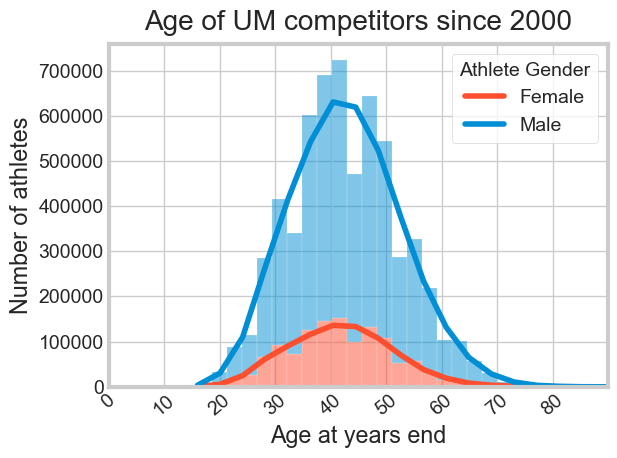

In [57]:
# Create a histogram showing the standardized age categories, stacked with the gender
sns.histplot(
    data = df2, 
    x = 'athlete_age_at_years_end',
    hue = 'athlete_gender',
    multiple = 'stack',
    bins = 300,
    kde = True
)
plt.xticks(ticks = np.arange(0,90,10))
plt.tick_params(axis = 'x',labelrotation = 40) # Rotating x ticks to ensure they dont overlap
plt.title('Age of UM competitors since 2000', pad=10)
plt.xlabel('Age at years end')
plt.ylabel('Number of athletes')
plt.xlim(0,90)
plt.legend(title = 'Athlete Gender', labels = ['Female', 'Male'])

plt.tight_layout()
plt.show()

## Investigating trends in UM popularity

In [58]:
# Group by year and gender
year_grp = df2.groupby(['year_of_race', 'athlete_gender']).size().unstack()
year_grp.head()

athlete_gender,F,M
year_of_race,,
2000,12479,59701
2001,10703,52276
2002,10650,53546
2003,13184,64554
2004,15024,70350


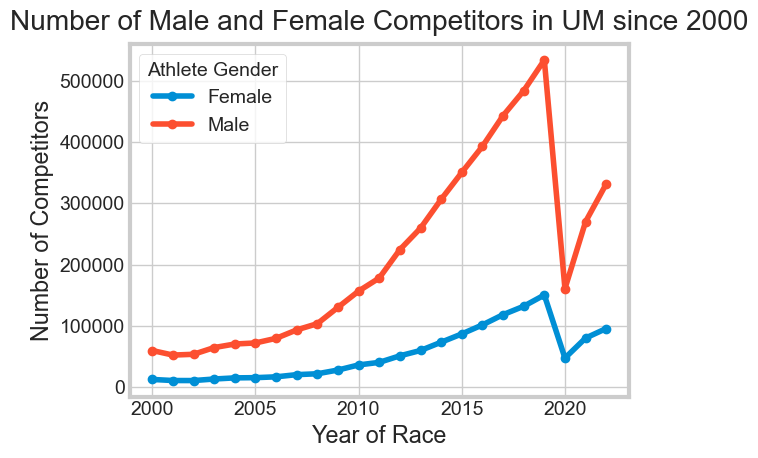

In [59]:
# Plot the number of male and female compeititors since 2000
year_grp.plot(kind = 'line', marker = 'o')

plt.xlabel('Year of Race')
plt.ylabel('Number of Competitors')
plt.legend(title = 'Athlete Gender', labels = ['Female', 'Male'])
plt.title('Number of Male and Female Competitors in UM since 2000', pad = 10)

plt.tight_layout()
plt.show()

## Popularity of different race types

In [60]:
# Obtain the top 10 most popular race types 
top_10_race_type = df2['race_distance/length'].value_counts().head(10)
top_10_race_type.head()

race_distance/length
50km     1343663
100km     661198
50mi      290511
56km      216098
100mi     152376
Name: count, dtype: int64

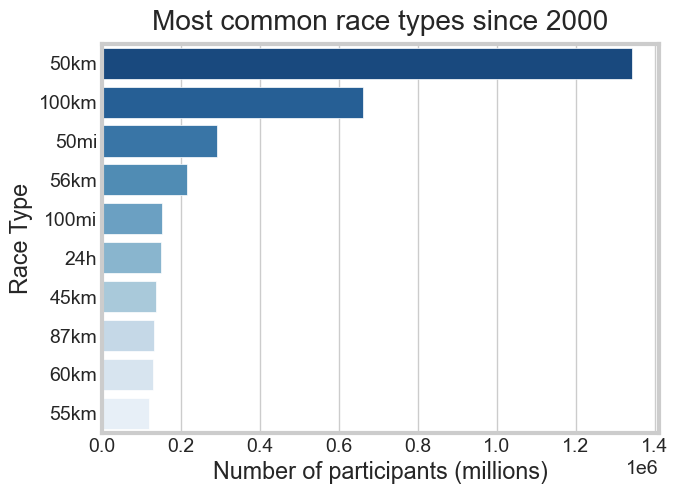

In [61]:
# Bar plot showing most popular race types
sns.barplot(
    x = top_10_race_type.values,
    y = top_10_race_type.index,
    hue = top_10_race_type.index,
    legend = False,
    orient = 'h',
    palette='Blues_r'
)

plt.title('Most common race types since 2000', pad = 10)
plt.xlabel('Number of participants (millions)')
plt.ylabel('Race Type')

plt.tight_layout
plt.show()

## Investigating countries where UM are most commonly held

In [62]:
top_10_countries = df2['country_of_race'].value_counts().head(10)
top_10_countries

country_of_race
USA    1261740
FRA    1020239
RSA     602908
JPN     484335
ITA     335173
GER     254508
GBR     249694
CHN     196433
ESP     195807
TPE     135318
Name: count, dtype: int64

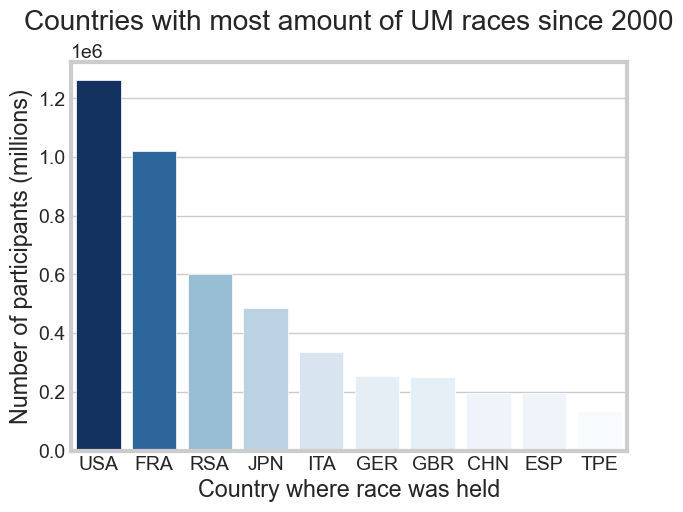

In [63]:
# Create a bar plot showing countries that hold most amount of UM's
sns.barplot(
    x = top_10_countries.index,
    y = top_10_countries.values,
    hue = top_10_countries.values,
    palette = 'Blues',
    legend = False
)
plt.title('Countries with most amount of UM races since 2000', pad= 10)
plt.xlabel('Country where race was held')
plt.ylabel('Number of participants (millions)')
plt.tight_layout
plt.show()

## Investigating athlete performance and speed for distance events

In [64]:
# Creating dataset only for events measured by distance
df_dist = df2.groupby('timed_race?').get_group(False)

In [65]:
# Formatting performance (hours) to be type float 
df_dist['athlete_performance'] = df_dist['athlete_performance'].astype(float)

/var/folders/nt/6vczs37n0kg258110pw_sbyh0000gn/T/ipykernel_46156/1568915022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['athlete_performance'] = df_dist['athlete_performance'].astype(float)


## Visualizing athlete speed for popular race type 

In [66]:
# Only invesitgating the 50k, 50mi, 100k, 100mi 
df_pop = df_dist[df_dist['race_distance/length'].isin(['50km', '50mi', '100km', '100mi'])]

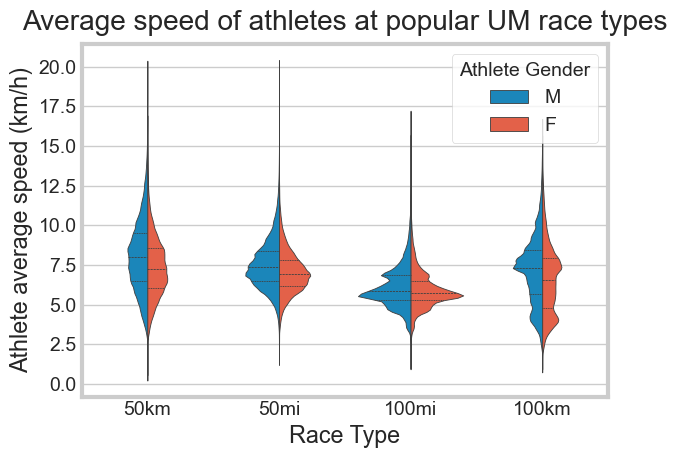

In [67]:
sns.violinplot(data = df_pop,
               x = 'race_distance/length',
               y = 'athlete_average_speed',
               hue = 'athlete_gender',
               split = True,
               inner = 'quartz',
)
plt.ylabel('Athlete average speed (km/h)')
plt.xlabel('Race Type')
plt.title('Average speed of athletes at popular UM race types', pad =10)
plt.legend(title = 'Athlete Gender')

plt.tight_layout()
plt.show()

## Investigating 100km races

In [68]:
df_100 = df_dist[df_dist['race_distance/length'] == '100km']

In [69]:
# We can see there is over 2000 100km races
print('Number of 100km race ',len(df_100['race_name'].value_counts())) 

Number of 100km race  2179


## Median time taken to finish 100km race 

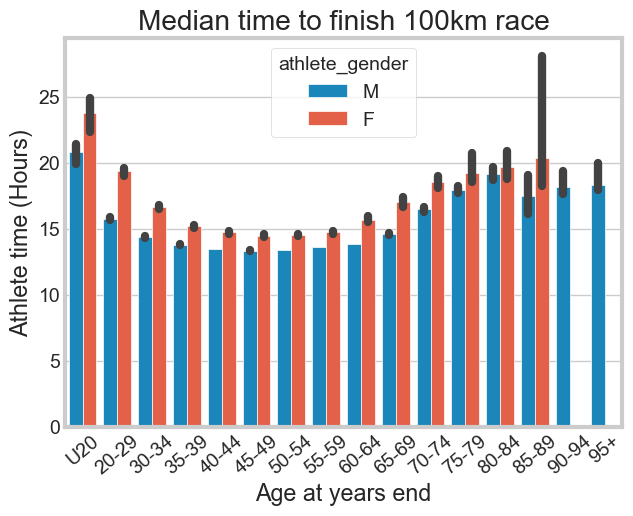

<Figure size 3000x1000 with 0 Axes>

In [70]:
sns.barplot(
    data = df_100,
    x = 'standardized_age_category',
    y = 'athlete_performance',
    hue = 'athlete_gender',
    estimator = 'median', 
    errorbar= 'ci'
)
plt.tick_params(axis = 'x',labelrotation = 40) # Rotating x ticks to ensure they dont overlap
plt.xlabel('Age at years end')
plt.ylabel('Athlete time (Hours)')
plt.title('Median time to finish 100km race')
plt.figure(figsize = (30,10))
plt.tight_layout()
plt.show()

In [71]:
# Summary statistics of time taken to finish 100km
df_100['athlete_performance'].describe()

count    661198.000000
mean         15.742722
std           5.802042
min           0.364167
25%          11.912500
50%          13.810556
75%          18.219444
max          47.991944
Name: athlete_performance, dtype: float64

In [72]:
# Median time to finish 100km
df_100['athlete_performance'].median()

13.810555555555556

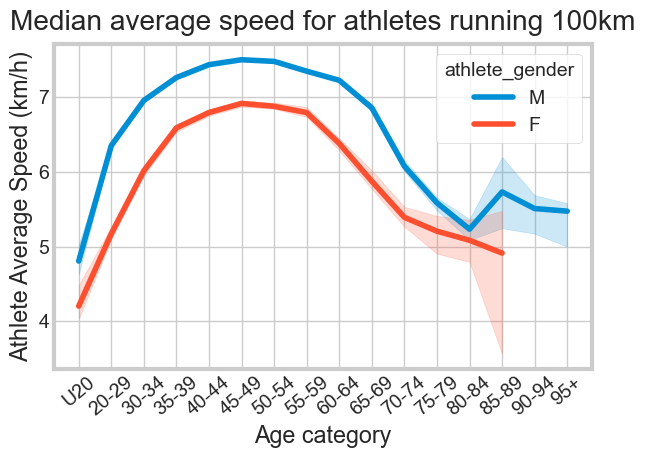

In [73]:
# Average Speed for Different Age Categories in 100km
sns.lineplot(data = df_100,
             x = 'standardized_age_category',
             y='athlete_average_speed',
             hue = 'athlete_gender',
             estimator = 'median',
             errorbar = 'ci',
)
plt.tick_params(axis = 'x',labelrotation = 40) # Rotating x ticks to ensure they dont overlap
plt.ylabel('Athlete Average Speed (km/h)')
plt.xlabel('Age category')
plt.title('Median average speed for athletes running 100km', pad = 10)

plt.tight_layout()
plt.show()

## The toughest 100km races

In [74]:
# Only compare the top 100 most popular races 
race_name_data = pd.DataFrame(df_100['race_name'].value_counts())
race_name_data = race_name_data.head(100)
race_name_data = df_100[df_100['race_name'].isin(race_name_data.index)] # Create df with only those races in it

In [75]:
tough_ranking = race_name_data.groupby('race_name').agg({
    'athlete_performance':'median', 'athlete_average_speed':'median'
})
# Choose races that have slowest median race completion time and then lowest average median speed
tough_ranking.sort_values(['athlete_performance','athlete_average_speed'], ascending = [False, True]).head(10)

,athlete_performance,athlete_average_speed
race_name,,
Oxfam Trailwalker Hong Kong,30.347222,3.2950
The Most Beautiful Thing (TMBT) 100 km Ultra Trail Marathon,27.397778,3.6500
Jurassic Coast Challenge,26.388333,3.7895
Cotswold Way Challenge,26.144167,3.8250
Cameron 100 Km Ultra Trail,25.996111,3.8465
SkyRun 100 Km,25.527778,3.9170
Columbia 100 Ultra Trail Chongli Challenge Race,25.359583,3.9430
Limanowski Ekstremalny Maraton Pieszy KIERAT,25.150000,3.9760
London 2 Brighton Challenge,25.069722,3.9890
